In [151]:
!pip install scikit-learn

In [152]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
from sklearn.linear_model import LogisticRegression


In [153]:
df = pd.read_csv("C:\\Users\\Admin\\OneDrive_2025-03-04\\Medical diagnosis using AI\\Datasets\\hypothyroid.csv")
df
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [154]:
#Check for missing values
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [161]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [163]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [165]:
df.index

RangeIndex(start=0, stop=3772, step=1)

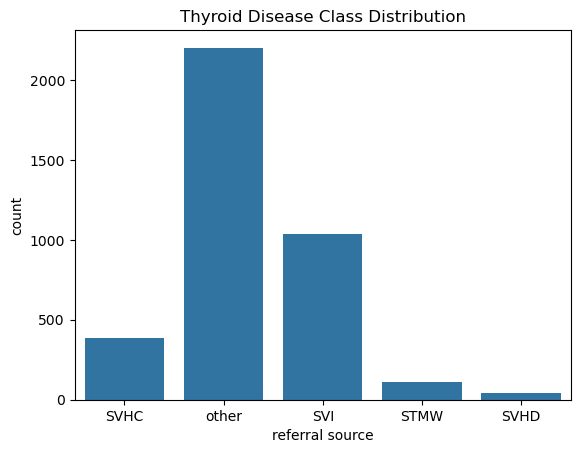

In [167]:
sns.countplot(x=df['referral source'])  
plt.title("Thyroid Disease Class Distribution")  
plt.show()

In [169]:
df['referral source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [171]:
y = df["referral source"]  # Target
X = df.drop("referral source", axis=1)  # Features

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
df['binaryClass'].unique()

array(['P', 'N'], dtype=object)

In [176]:
from sklearn.preprocessing import LabelEncoder
lblEn = LabelEncoder()
df['binaryClass'] =lblEn.fit_transform(df['binaryClass'])

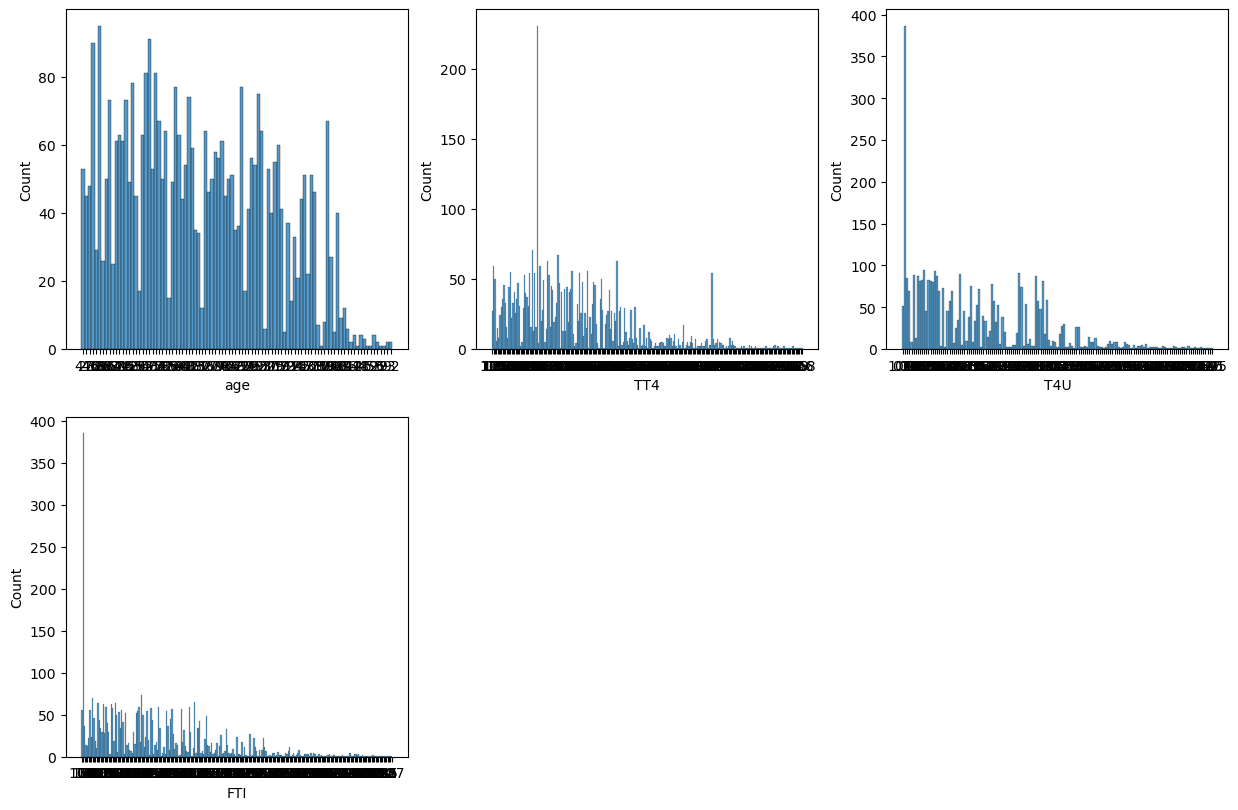

In [177]:
columns = ['age','TT4','T4U','FTI']
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.histplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [180]:
scaler = StandardScaler()

In [181]:
scaler.fit(X)

StandardScaler()

In [182]:
standardized_data = scaler.transform(X)

In [183]:
print(standardized_data)

[[-0.0162844  -0.03258176 -0.03258176 ... -0.1205153  -0.33714969
   0.28913088]
 [-0.0162844  -0.03258176 -0.03258176 ... -0.1205153   2.96604157
   0.28913088]
 [-0.0162844  -0.03258176 -0.03258176 ... -0.1205153  -0.33714969
   0.28913088]
 ...
 [-0.0162844  -0.03258176 -0.03258176 ... -0.1205153  -0.33714969
   0.28913088]
 [-0.0162844  -0.03258176 -0.03258176 ... -0.1205153  -0.33714969
   0.28913088]
 [-0.0162844  -0.03258176 -0.03258176 ... -0.1205153  -0.33714969
   0.28913088]]


In [184]:
X = standardized_data
Y = df['binaryClass']

In [185]:
print(X)
print(Y)

[[-0.0162844  -0.03258176 -0.03258176 ... -0.1205153  -0.33714969
   0.28913088]
 [-0.0162844  -0.03258176 -0.03258176 ... -0.1205153   2.96604157
   0.28913088]
 [-0.0162844  -0.03258176 -0.03258176 ... -0.1205153  -0.33714969
   0.28913088]
 ...
 [-0.0162844  -0.03258176 -0.03258176 ... -0.1205153  -0.33714969
   0.28913088]
 [-0.0162844  -0.03258176 -0.03258176 ... -0.1205153  -0.33714969
   0.28913088]
 [-0.0162844  -0.03258176 -0.03258176 ... -0.1205153  -0.33714969
   0.28913088]]
0       1
1       1
2       1
3       1
4       1
       ..
3767    1
3768    1
3769    1
3770    1
3771    1
Name: binaryClass, Length: 3772, dtype: int32


In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [187]:
print(X.shape, X_train.shape, X_test.shape)

(3772, 1092) (3017, 1092) (755, 1092)


In [188]:
# Model Training

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [189]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [190]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [191]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [192]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9986754966887417


In [193]:
# Encode categorical variables if any
df = pd.get_dummies(df, drop_first=True)

# Split into features and target
# Features  
X = df.drop("binaryClass", axis=1)  
# Target  
y = df["binaryClass"]    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [194]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [195]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Model Accuracy: 94.44%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.33      0.47        58
           1       0.95      1.00      0.97       697

    accuracy                           0.94       755
   macro avg       0.91      0.66      0.72       755
weighted avg       0.94      0.94      0.93       755



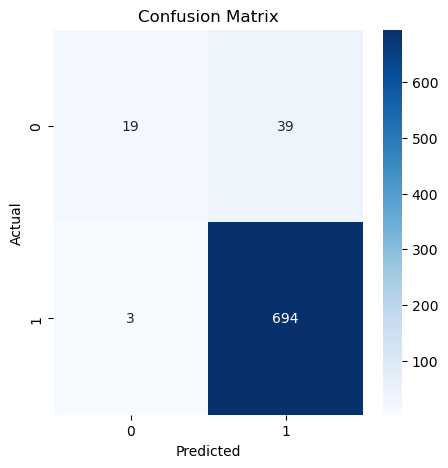

In [196]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [197]:
import joblib

# Save the model
joblib.dump(model, "thyroid_model.pkl")

# Load the model
loaded_model = joblib.load("thyroid_model.pkl")

# Make a new prediction
new_prediction = loaded_model.predict([X_test[0]])
print(f"Predicted Class: {new_prediction}")


Predicted Class: [1]
